# Install Dependencies

In [2]:
! pip install pandas matplotlib statsmodels  


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Load Dependencies and Dataset

In [3]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# load dataset
df = pd.read_csv('Time_Series_Data/AirPassengers.csv')

# show first few rows of data 
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Detecting Seasonality

## Detect Seasonality Using Line Plots

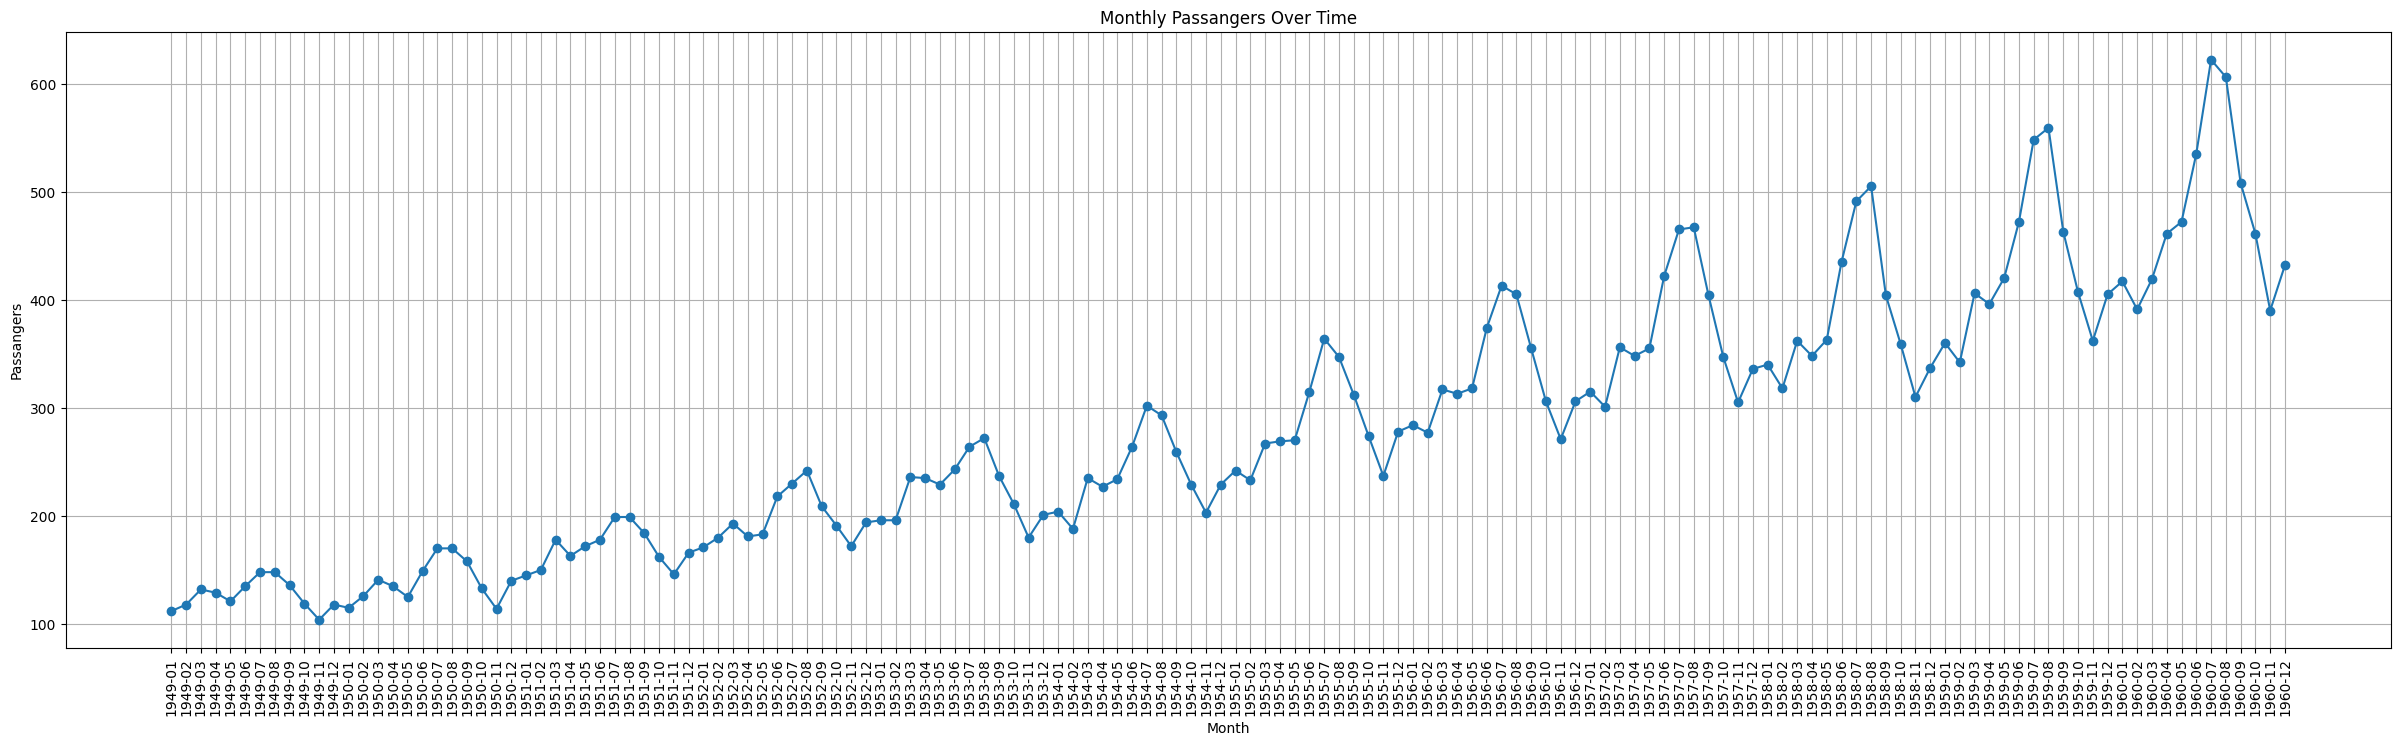

In [4]:
# plot the time series data
plt.figure(figsize=(30, 8))
plt.plot(df['Month'], df['#Passengers'], marker='o', linestyle='-')

# add metadata to plot
plt.title('Monthly Passangers Over Time')
plt.xlabel('Month')
plt.ylabel('Passangers')
plt.xticks(rotation = 90)
plt.grid(True)

# show plot
plt.show()

## Detect Seasonality Using Seasonal Decomposition 

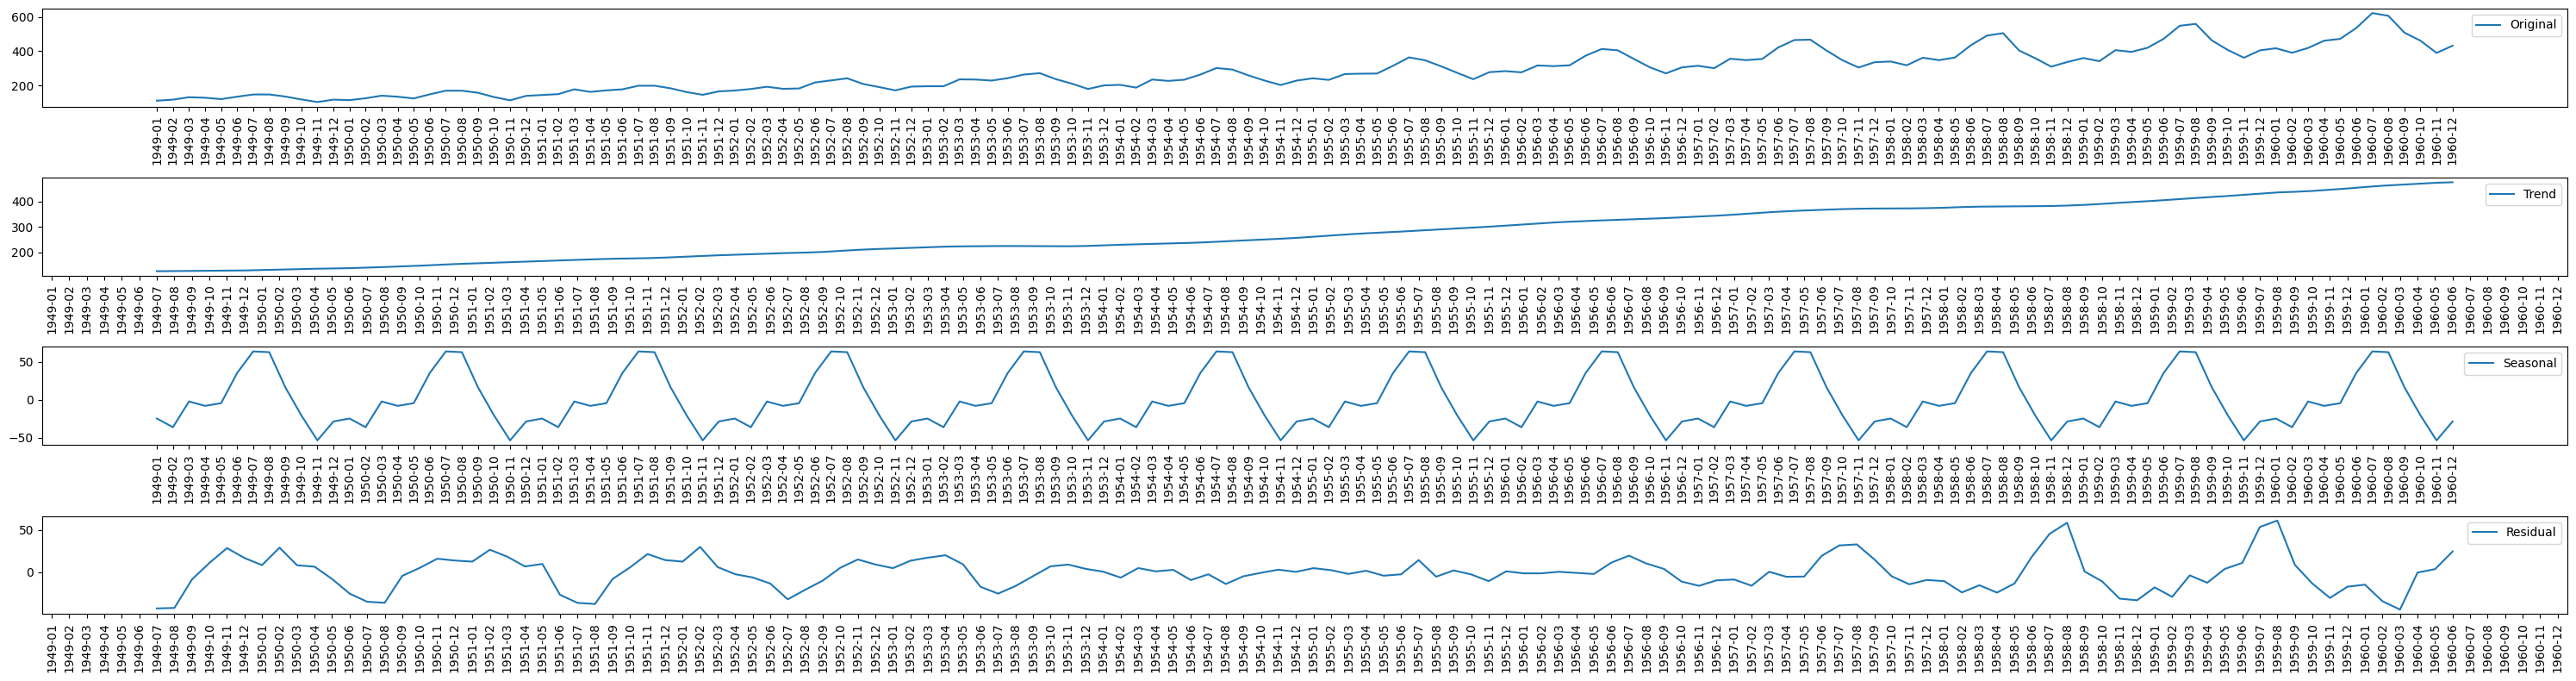

In [5]:
df.set_index('Month', inplace=True)
df['#Passengers'] =df['#Passengers'].astype(int)


# perform seasonal decomposition
result = seasonal_decompose(df['#Passengers'], model='additive', period=12)

# plot the original data
plt.figure(figsize=(30, 8))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original')
plt.legend(loc='best')
plt.xticks(rotation = 90)

# plot trend in data 
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.xticks(rotation = 90)

# plot seasonality in data
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.xticks(rotation = 90)

# plot residual components
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='best')
plt.xticks(rotation = 90)

# show plot
plt.tight_layout()
plt.show()

## Detect Seasonality Using Autocorrelation Function (ACF)

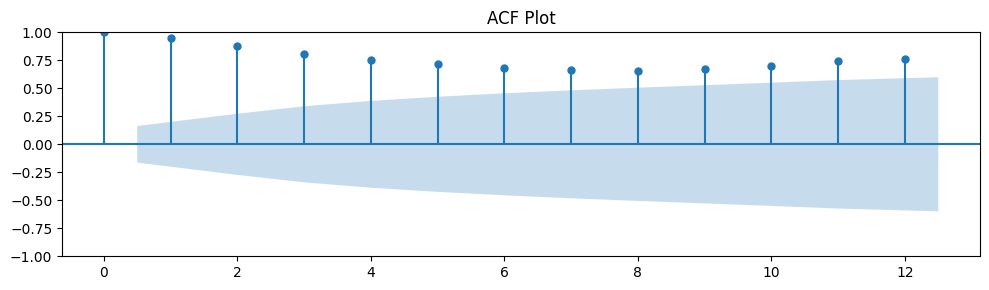

In [11]:
# define the lag value for ACF and PACF plots
max_lag = 12

# create ACF and PACF plots
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 3))

# ACF Plot
plot_acf(df, lags=max_lag, ax=ax1)
ax1.set_title('ACF Plot')

plt.tight_layout()
plt.show()

## Detect Seasonality Using Partial Autocorrelation Function (PACF)

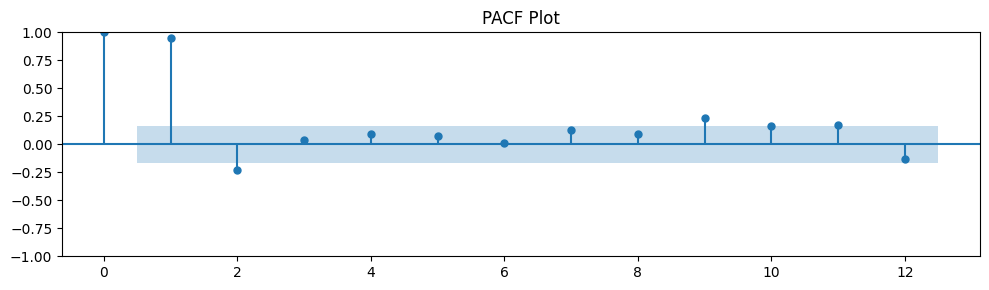

In [12]:
# define the lag value for ACF and PACF plots
max_lag = 12

# create ACF and PACF plots
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 3))

# ACF Plot
plot_pacf(df, lags=max_lag, ax=ax1)
ax1.set_title('PACF Plot')

# show plot
plt.tight_layout()
plt.show()